# Spotify Data Analysis

In the previous notebook I collected and stored different datasets and features of my spotify listening data. In this notebook we will be analyzing that data to gleam insights

## Initialization

### Connect to Drive

In [1]:
# Use for normal projects
# In colab since I use that for other subjects as well I have partitioned it accordingly 
# But for my local drive I like to keep it simple
import os
import sys
from pathlib import Path
if 'google.colab' in str(get_ipython()):
  print('Running on Colab')
  from google.colab import drive
  drive.mount('/content/drive') 
  %pip install swifter -qq
  %pip install spotipy --upgrade -qq
  base_folder = Path('/content/drive/MyDrive/colab_notebooks/')
  subject = 'aml'
  data = base_folder/subject/'data/'
  archive = base_folder/subject/'archive/'
  output = base_folder/subject/'output'
  if not Path(base_folder/subject/'output').exists():
    os.makedirs(output,exist_ok=True)
  print(f'Base Folder is {base_folder}')
  print(f'Data Folder is {data}')
  print(f'Archive Folder is {archive}')
  print(f'Output Folder is {output}')
else:
  print('Not Running on Colab')
  # Add the path to the custom-functions directory in the local file system to sys.path
  sys.path.append('C:/Users/Abdul Rauf Maroof/OneDrive/Documents/MSBA/notebooks/Spotify_Project/custom_functions')
  base_folder = Path('C:/Users/Abdul Rauf Maroof/OneDrive/Documents/MSBA')
  data = base_folder/'data_sets/'
  archive = base_folder/'archive/'
  output = base_folder/'notebooks/Spotify_Project'/'output'
  cleaned_data = base_folder/'notebooks/Spotify_Project'/'cleaned_data'
  if not (base_folder/'notebooks/Spotify_Project'/'output').exists():
    os.makedirs(output,exist_ok=True)
  print(f'Base Folder is {base_folder}')
  print(f'Data Folder is {data}')
  print(f'Archive Folder is {archive}')
  print(f'Output Folder is {output}')
  print(f'Cleaned Data Folder is {cleaned_data}')
  print(f'The path to the custom functions is {sys.path[-1]}')
  print(f'The working directory is {os.getcwd()}')


Not Running on Colab
Base Folder is C:\Users\Abdul Rauf Maroof\OneDrive\Documents\MSBA
Data Folder is C:\Users\Abdul Rauf Maroof\OneDrive\Documents\MSBA\data_sets
Archive Folder is C:\Users\Abdul Rauf Maroof\OneDrive\Documents\MSBA\archive
Output Folder is C:\Users\Abdul Rauf Maroof\OneDrive\Documents\MSBA\notebooks\Spotify_Project\output
Cleaned Data Folder is C:\Users\Abdul Rauf Maroof\OneDrive\Documents\MSBA\notebooks\Spotify_Project\cleaned_data
The path to the custom functions is C:/Users/Abdul Rauf Maroof/OneDrive/Documents/MSBA/notebooks/Spotify_Project/custom_functions
The working directory is c:\Users\Abdul Rauf Maroof\OneDrive\Documents\MSBA\notebooks\Spotify_Project


### Import Libraries

In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # for mathemtical operations and other powerful calculations
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import glob

# For data visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.io as pio
pio.templates.default = "plotly_dark"

In [35]:
# We'll try to set the theme closely to the one used in the Spotify app
# https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set_context('paper')
sns.set_style('darkgrid')

# Set style to white
sns.set_style("white")

# Set palette to match Spotify colors
sns.set_palette(['#1DB954', '#191414'])

### Importing the data cleaned from the last notebook

In [9]:
# Use glob to get the list of files
files = glob.glob(str(cleaned_data/'*.csv')); files

# Read the files into a list of dataframes
for file in files:
    globals()[file.split('\\')[-1].split('.')[0]] = pd.read_csv(file, index_col=0).reset_index(drop=True)

## Creating connections between tables

In [41]:
# Check the dataframes
list_of_dataframes = [file.split('\\')[-1].split('.')[0] for file in files]

for i in list_of_dataframes:
    print(i, globals()[i].shape)

audio_features (5586, 16)
genres (5586, 8)
genres_expanded (18153, 9)
library_artists (34, 2)
library_shows (55, 3)
library_tracks (579, 4)
playlist_contents_data (1227, 6)
playlist_core_data (20, 3)
podcasts (355, 3)
streaming_data (36121, 10)
tracks (5586, 10)


## Visualizations

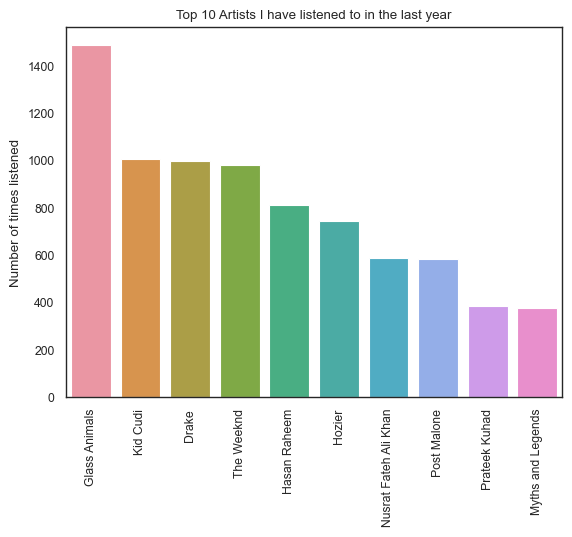

In [36]:
# Streaming data shows that I have listened to 2410 artists in the last year
sns.barplot(x=streaming_data['artistName'].value_counts().index[:10], y=streaming_data['artistName'].value_counts()[:10])
plt.xticks(rotation=90)
plt.ylabel('Number of times listened')
plt.title('Top 10 Artists I have listened to in the last year')
plt.show()